In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
s = pd.Series([1, 3, 5, np.nan, 6, 8])
dates = pd.date_range("20130101", periods=6)
df1= pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df2 = pd.DataFrame(
        {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(4)), dtype="float32"),
            "D": np.array([3] * 4, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test", "train"]),
            "F": "foo",
        }
   )
df1

#df2.dtypes
#df2


,A,B,C,D
2013-01-01,-1.137245,-1.342575,2.073285,0.810078
2013-01-02,-0.269260,-1.492917,-1.589423,0.656945
2013-01-03,-1.120778,0.851169,0.210990,0.402349
2013-01-04,1.406075,-0.168995,-0.392541,1.338463
2013-01-05,1.191093,0.655533,-1.075332,-0.157702
2013-01-06,1.258877,-0.408561,0.368867,1.326254


View Data

In [ ]:
df2.head(2)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2.tail(2)

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#df2.columns
df2.to_numpy() 
#df2.describe()
#df2
#df2.shape


array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [ ]:
copy=df2
#copy.T
#copy.sort_index(axis=1, ascending=False)
copy.sort_values(by="E")


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
3,1.0,2013-01-02,1.0,3,train,foo


Getting data


In [ ]:
#df2["A"]
#df2[0:3]
df1["20130102":"20130104"]


,A,B,C,D
2013-01-02,-1.541343,0.187320,0.065069,-0.966472
2013-01-03,0.833969,0.395658,-1.199531,0.767321
2013-01-04,0.527293,-1.043244,-1.817032,0.839471


Selecting by label


In [ ]:
#df1.loc[dates[0]]
#df2.loc[:, ["A", "B"]]
#df1.loc["20130102":"20130104", ["A", "B"]]
#df1.loc["20130102", ["A", "B"]]
df1.loc[dates[0], "A"]  or df.at[dates[0], "A"]


0.028064143359158404


Select by position


In [ ]:
#df2.iloc[3]
#df1.iloc[3:5, 0:2]
#df1.iloc[[1, 2, 3], [0, 2]]
#df1.iloc[ : , 1:3]
#df2.iloc[1, 1]
df1.iat[1, 1]


0.18732045319496474

In [ ]:
cy = df2.copy()
cy["E"] = ["one", "one", "two", "three"]

cy[cy["E"].isin(["two"])]  #--> Filtering 


,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,two,foo


Setting Data

In [11]:
copy=df1

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6)) 
copy["F"] = s1

copy.at[dates[0], "A"] = 0 #--> set value by label 
copy.iat[0, 1] = 0 #--> set value by position 
copy.loc[:, "D"] = np.array([5] * len(df1))  #--> setting by assigning with numpy array 
copy

,A,B,C,D,F
2013-01-01,0.000000,0.000000,2.073285,5,NaN
2013-01-02,-0.269260,-1.492917,-1.589423,5,1.0
2013-01-03,-1.120778,0.851169,0.210990,5,2.0
2013-01-04,1.406075,-0.168995,-0.392541,5,3.0
2013-01-05,1.191093,0.655533,-1.075332,5,4.0
2013-01-06,1.258877,-0.408561,0.368867,5,5.0


In [9]:
#df1
df1.apply(np.cumsum)
#df1.apply(lambda x: x.max() - x.min())

,A,B,C,D
2013-01-01,-1.137245,-1.342575,2.073285,0.810078
2013-01-02,-1.406504,-2.835491,0.483862,1.467022
2013-01-03,-2.527283,-1.984322,0.694853,1.869371
2013-01-04,-1.121208,-2.153317,0.302312,3.207834
2013-01-05,0.069886,-1.497784,-0.773020,3.050132
2013-01-06,1.328763,-1.906345,-0.404153,4.376386


Histogram

In [12]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

4    3
0    3
6    1
5    1
2    1
1    1
dtype: int64

In [14]:
s=pd.Series(["A","B","abcD"])
s.str.lower()

0       a
1       b
2    abcd
dtype: object

In [15]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]] # breaking the data set
pd.concat(pieces)

,0,1,2,3
0,0.240725,0.051209,-1.310229,-0.072220
1,-0.188894,0.167633,0.408784,-0.479383
2,-0.529432,1.001775,0.380024,0.712658
3,-0.753152,0.718257,0.201792,0.367157
4,1.103760,1.038606,-1.875062,0.411032
5,-0.140067,0.098296,0.245014,0.190709
6,1.753100,-1.000647,0.419179,-0.412200
7,-0.801437,-0.689001,-0.451044,0.290586
8,-0.608008,0.172868,-0.327798,-3.507576
9,0.509448,1.012179,-0.232294,-0.073321


In [17]:
df = pd.DataFrame(
{
"A": ["foo", "bar", "foo", "bar", "foo"],
"B": ["one", "one", "two", "three", "three"],
"C": np.random.randn(5),
"D": np.random.randn(5),
}
)

df.groupby("A").sum()
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.502868  1.307338
    three  0.556212  1.202578
foo one    1.272847  0.219803
    three  0.828506 -0.917575
    two    0.751985 -0.190408

Time Series

In [20]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)

ts_utc = ts.tz_localize("UTC")
ts_utc

ts_utc.tz_convert("US/Eastern")

rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ps = ts.to_period()
ps.to_timestamp()

2012-01-01    0.916115
2012-02-01   -0.053758
2012-03-01   -1.435458
2012-04-01   -1.160031
2012-05-01   -0.669236
Freq: MS, dtype: float64

Categorical vars

In [23]:
df = pd.DataFrame(
   {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   )
df["grade"] = df["raw_grade"].astype("category")
df['grade']

df["grade"].cat.categories = ["very good", "good", "very bad"]  #-->Series.cat.catergories() 

df["grade"] = df["grade"].cat.set_categories(
   ["very bad", "bad", "medium", "good", "very good"]
   )
df["grade"]

df.sort_values(by="grade")
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

Plotting data

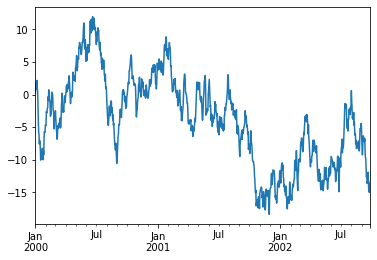

<Figure size 432x288 with 0 Axes>

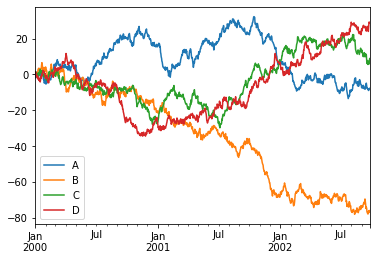

In [26]:
import matplotlib.pyplot as plt
plt.close() #--> used to close a figure window 

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"] )
  
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best')
